<a href="https://colab.research.google.com/github/parkminhyung/R-code-for-finance/blob/master/KRX%20LIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install "pacman" package

In [ ]:
install.packages("pacman")
pacman::p_load("httr","rvest","readr","formattable","sparkline")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlwidgets’



formattable installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


sparkline installed



Set uni Time Zone

In [ ]:
options(scipen = 999)
"%+%" = paste0

Sys.setenv(TZ = "Asia/Seoul")
'%ni%' = Negate('%in%')
if(weekdays(Sys.Date()) %ni% c("Saturday", "Sunday","Monday") & ("00:00:00" < format(Sys.time(), "%X")) & (format(Sys.time(), "%X") < "09:00:00")==TRUE) {
  DT = format(Sys.Date()-1,"%Y%m%d",tz = "Asia/Seoul")
} else if(weekdays(Sys.Date())=="Saturday"){
  DT = format(Sys.Date()-1,"%Y%m%d",tz = "Asia/Seoul")
} else if(weekdays(Sys.Date())=="Sunday"){
  DT = format(Sys.Date()-2,"%Y%m%d",tz = "Asia/Seoul")
} else if(weekdays(Sys.Date()) == "Monday" & ("00:00:00" < format(Sys.time(), "%X")) & (format(Sys.time(), "%X") < "09:00:00") == TRUE){
  DT = format(Sys.Date()-3,"%Y%m%d",tz = "Asia/Seoul")
} else {
  DT = format(Sys.Date(),"%Y%m%d",tz = "Asia/Seoul")
}

Download code list from KRX website and preprocess dataframe

In [ ]:
otp_url = "http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd"
otp_from_data = list(
  mktId = 'ALL',
  trdDd = DT,
  share = '1',
  money = '1',
  csvxls_isNo = 'false',
  name = 'fileDown',
  url = 'dbms/MDC/STAT/standard/MDCSTAT01501'
)
otp = POST(otp_url,query = otp_from_data) %>%
  read_html() %>%
  html_text()

csv_url= 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
data = POST(csv_url,
            query = list(code = otp)) %>%
  read_html(encoding = "EUC-KR") %>%
  html_text() %>%
  read_csv() %>%
  .[,c(2,1,3:ncol(.))] %>%
  .[c(which(.[3]=="KOSPI"),which(.[3]=="KOSDAQ"),which(.[3]=="KONEX")),] %>%
  as.data.frame()

data$등락률 = data$등락률 %+% "%"
data$소속부[which(is.na(data$소속부))] = "-"

data

Rows: 2753 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): 종목코드, 종목명, 시장구분, 소속부
dbl (10): 종가, 대비, 등락률, 시가, 고가, 저가, 거래량, 거래대금, 시가총액, 상장주식수...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


종목명,종목코드,시장구분,소속부,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AJ네트웍스,095570,KOSPI,-,4320,-305,-6.59%,4630,4630,4260,723083,3148639250,202272314400,46822295
AK홀딩스,006840,KOSPI,-,18970,210,1.12%,18570,18970,18570,3525,65845970,251306232170,13247561
BGF,027410,KOSPI,-,3620,-25,-0.69%,3635,3645,3605,26018,94269605,346494783420,95716791
BGF리테일,282330,KOSPI,-,149600,-3700,-2.41%,153700,153900,149600,21250,3194618800,2585672337600,17283906
BNK금융지주,138930,KOSPI,-,7200,60,0.84%,7130,7230,7110,870591,6257455310,2319036753600,322088438
BYC,001460,KOSPI,-,402500,500,0.12%,402000,404000,397000,62,24931500,251407537500,624615
BYC우,001465,KOSPI,-,140000,800,0.57%,139200,140100,139200,1426,199585200,30153900000,215385
CJ,001040,KOSPI,-,90800,300,0.33%,89600,92900,89300,224583,20500227600,2649271418400,29176998
CJ CGV,079160,KOSPI,-,7420,150,2.06%,7270,7420,7230,184954,1355171390,354163426400,47730920


Build formattable. highly recommend you run this code in Rstuido env

In [ ]:
formtable = formattable(data, align = c("l","c","c",rep("l",4),rep("c",4),rep("r",3)), list(
  '종목명' = formatter("span",style = x~style(font.weight = "bold")),
  '종목코드' = formatter("span",style = x~style(font.weight = "bold")),
  '시장구분' = formatter("span",style = x~style(font.weight = "bold")),
  '대비' = formatter("span",
                   style = x ~ style(color = ifelse(grepl(x=data[,6],"-")==TRUE , "red", "green")),
                   x ~ icontext(ifelse(grepl(x=data[,6],"-")==TRUE, "arrow-down", "arrow-up"), x)),
  '종가' = formatter("span",style = x~style(font.weight = "bold",
                                          color = ifelse(grepl(x=data[,6],"-")==TRUE , "red", "green"))),
  '등락률' = formatter("span",
                    style = x ~ style(font.weight = "bold",
                                      color = ifelse(grepl(x=data[,7],"-")==TRUE , "red", "green")),
                    x ~ icontext(ifelse(grepl(x=data[,6],"-")==TRUE, "arrow-down", "arrow-up"), x))
))

formtable

종목명,종목코드,시장구분,소속부,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AJ네트웍스,095570,KOSPI,-,4320,-305,-6.59%,4630,4630,4260,723083,3148639250,202272314400,46822295
AK홀딩스,006840,KOSPI,-,18970,210,1.12%,18570,18970,18570,3525,65845970,251306232170,13247561
BGF,027410,KOSPI,-,3620,-25,-0.69%,3635,3645,3605,26018,94269605,346494783420,95716791
BGF리테일,282330,KOSPI,-,149600,-3700,-2.41%,153700,153900,149600,21250,3194618800,2585672337600,17283906
BNK금융지주,138930,KOSPI,-,7200,60,0.84%,7130,7230,7110,870591,6257455310,2319036753600,322088438
BYC,001460,KOSPI,-,402500,500,0.12%,402000,404000,397000,62,24931500,251407537500,624615
BYC우,001465,KOSPI,-,140000,800,0.57%,139200,140100,139200,1426,199585200,30153900000,215385
CJ,001040,KOSPI,-,90800,300,0.33%,89600,92900,89300,224583,20500227600,2649271418400,29176998
CJ CGV,079160,KOSPI,-,7420,150,2.06%,7270,7420,7230,184954,1355171390,354163426400,47730920


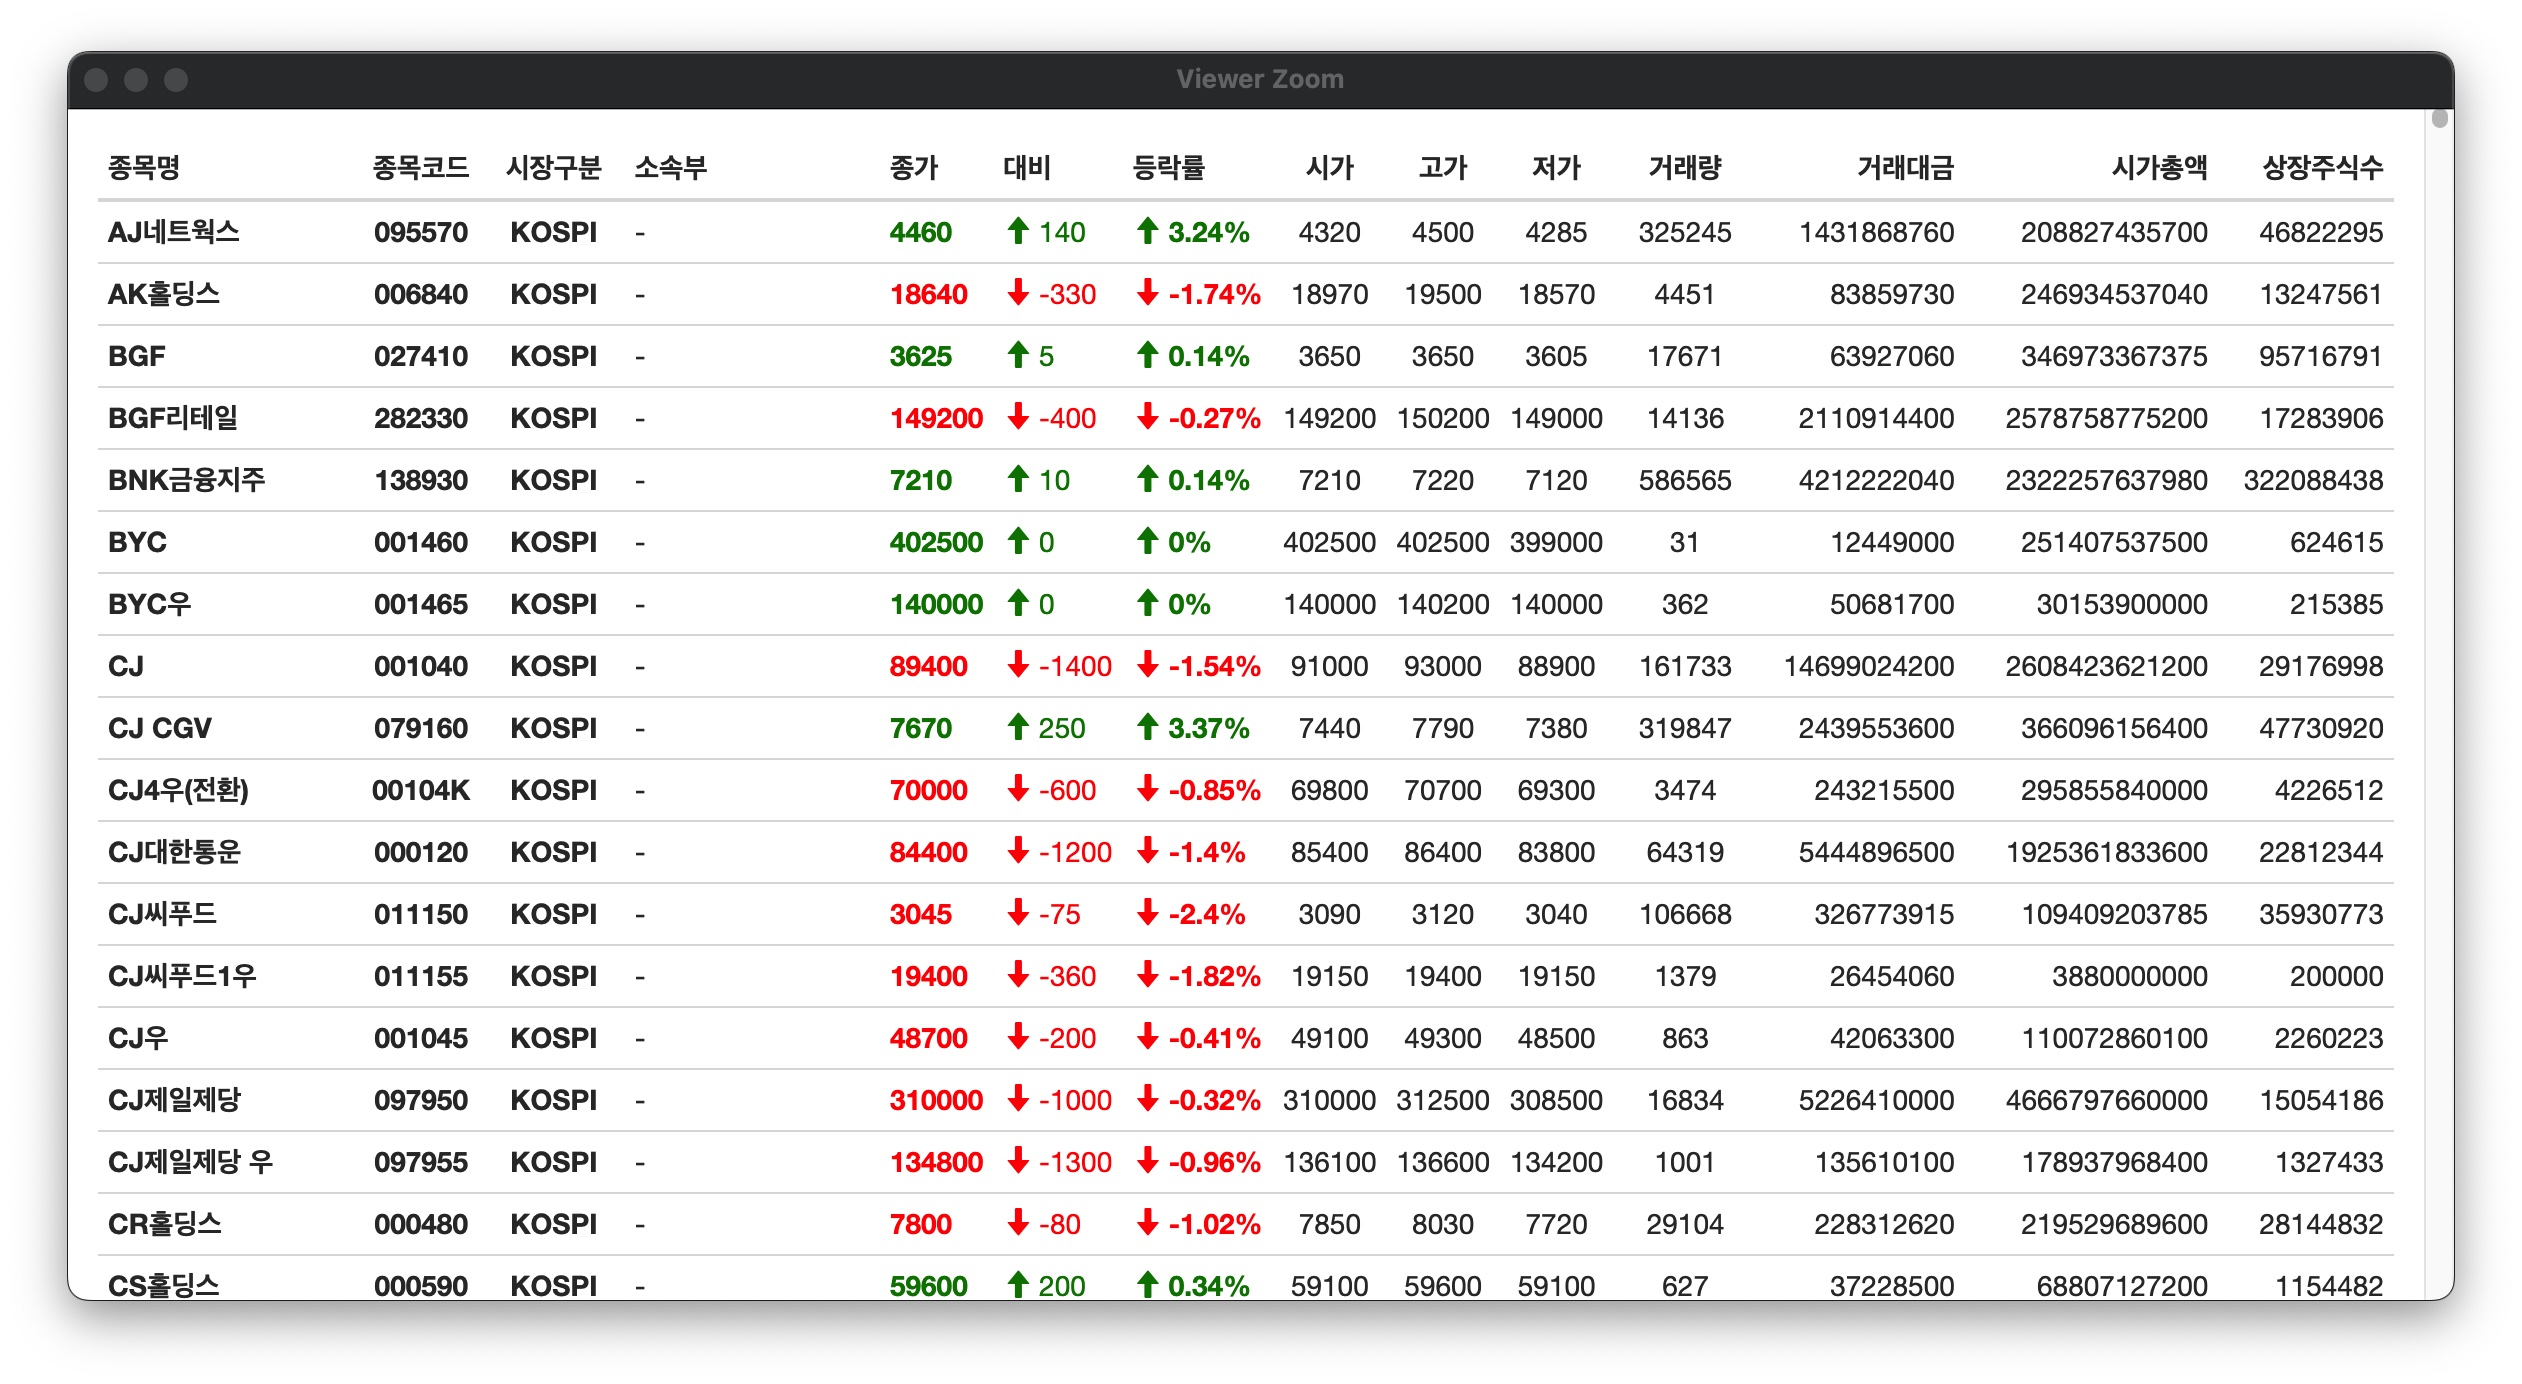